# **HOMEWORK 2**

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Xb,yb =load_boston(return_X_y=True)

In [4]:
df_boston = pd.DataFrame(Xb,columns = load_boston().feature_names)
df_boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [5]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
df_boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [12]:
df_boston.isin(['?']).sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

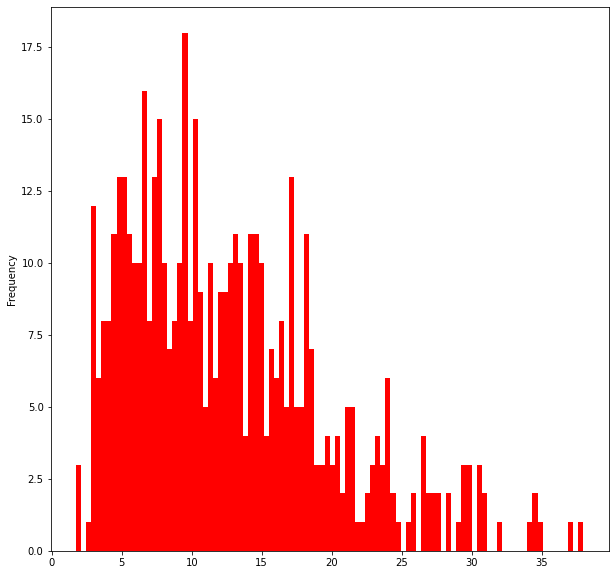

In [17]:
df_boston.LSTAT.plot(kind="hist",bins=100,figsize=(10,10),color="r")

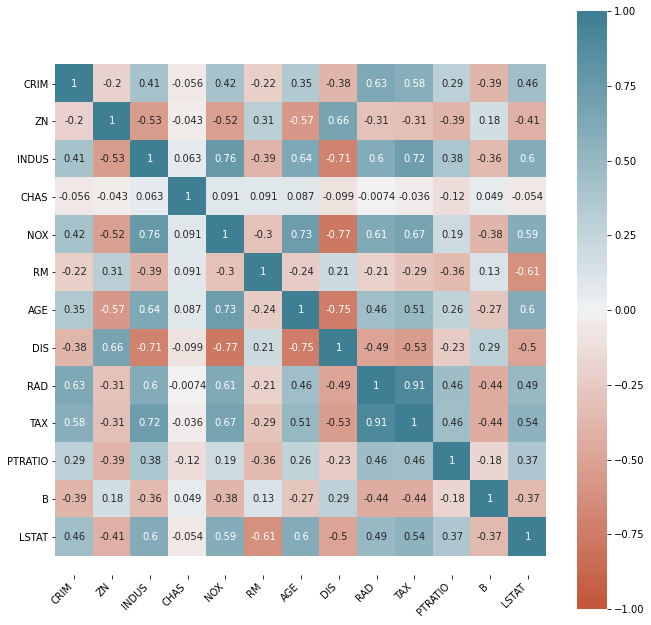

In [20]:
import seaborn as sns
corr = df_boston.corr()

plt.figure(figsize=(11, 11))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xb,yb, test_size=0.3, random_state=40)

In [21]:
modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

print(f'Regression model coef:\n {regression_model.coef_}')

Regression model coef:
 [-1.02065294e-01  3.92035307e-02 -6.13494400e-02  3.48084703e+00
 -1.74598953e+01  3.66444175e+00 -5.31304197e-03 -1.37067900e+00
  2.51447673e-01 -9.43832755e-03 -8.58133141e-01  6.78308990e-03
 -4.96519703e-01]


In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [27]:
#ridge regression
#alpha=0.02
ridge_model = Ridge(alpha = 0.02)
ridge_model.fit(X_train, y_train)
print(f'Ridge model coef:\n {ridge_model.coef_}')

Ridge model coef:
 [-1.01561812e-01  3.91804110e-02 -6.26513839e-02  3.47585774e+00
 -1.71253958e+01  3.66687268e+00 -5.62866618e-03 -1.36547788e+00
  2.50393264e-01 -9.46142182e-03 -8.55208143e-01  6.80551543e-03
 -4.96867230e-01]


In [29]:
#alpha=0.2
ridge_model = Ridge(alpha = 0.2)
ridge_model.fit(X_train, y_train)
print(f'Ridge model coef:\n {ridge_model.coef_}')

Ridge model coef:
 [-9.78079657e-02  3.90138692e-02 -7.24348735e-02  3.43363782e+00
 -1.46068212e+01  3.68381937e+00 -7.99043050e-03 -1.32637090e+00
  2.42532877e-01 -9.63848127e-03 -8.33320487e-01  6.97369520e-03
 -4.99606055e-01]


In [35]:
#alpha=3
ridge_model = Ridge(alpha = 3)
ridge_model.fit(X_train, y_train)
print(f'Ridge model coef:\n {ridge_model.coef_}')

Ridge model coef:
 [-0.08507282  0.0388429  -0.11090452  2.9786731  -4.44273806  3.65947277
 -0.01655178 -1.17196048  0.21586853 -0.01055273 -0.75350662  0.00760545
 -0.51875287]


In [36]:
#alpha=9
ridge_model = Ridge(alpha = 9)
ridge_model.fit(X_train, y_train)
print(f'Ridge model coef:\n {ridge_model.coef_}')

Ridge model coef:
 [-0.08671775  0.03987946 -0.12006689  2.36318572 -1.78321603  3.43916466
 -0.01670637 -1.1375774   0.21902188 -0.01117055 -0.74852759  0.00765694
 -0.54121956]


In [39]:
#alpha=15
ridge_model = Ridge(alpha =15)
ridge_model.fit(X_train, y_train)
print(f'Ridge model coef:\n {ridge_model.coef_}')

Ridge model coef:
 [-0.09026734  0.04085413 -0.12268134  1.96548566 -1.11483562  3.22894456
 -0.01532514 -1.1312228   0.22601112 -0.01154065 -0.75589628  0.00758326
 -0.5586337 ]


In [51]:
#alpha=5
ridge_model = Ridge(alpha =5)
ridge_model.fit(X_train, y_train)
print(f'Ridge model coef:\n {ridge_model.coef_}')

Ridge model coef:
 [-0.08486413  0.03916865 -0.11604736  2.73812059 -2.96766233  3.58836296
 -0.01711976 -1.15169532  0.21536971 -0.01081406 -0.74737041  0.0076618
 -0.52717931]


In [52]:
#alpha=4
ridge_model = Ridge(alpha =4)
ridge_model.fit(X_train, y_train)
print(f'Ridge model coef:\n {ridge_model.coef_}')

Ridge model coef:
 [-0.08476104  0.03899745 -0.11401726  2.85275532 -3.55840016  3.62493298
 -0.01697062 -1.15958528  0.21519081 -0.01069533 -0.74923659  0.00764356
 -0.52314812]


In [56]:
#lasso regression
lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)

print(f'Lasso model coef:\n {lasso_model.coef_}')

Lasso model coef:
 [-1.01516706e-01  3.91830000e-02 -6.25324609e-02  3.46204425e+00
 -1.71081340e+01  3.66462403e+00 -5.59631393e-03 -1.36470478e+00
  2.50431546e-01 -9.47024012e-03 -8.55197638e-01  6.80576647e-03
 -4.97167320e-01]


In [57]:
lasso_model = Lasso(alpha = 0.5)
lasso_model.fit(X_train, y_train)

print(f'Lasso model coef:\n {lasso_model.coef_}')

Lasso model coef:
 [-0.06215253  0.04062712 -0.07944284  0.         -0.          2.09215789
  0.         -0.85499866  0.22263171 -0.01291575 -0.71359538  0.00710938
 -0.6584616 ]


In [58]:
lasso_model = Lasso(alpha = 2)
lasso_model.fit(X_train, y_train)

print(f'Lasso model coef:\n {lasso_model.coef_}')

Lasso model coef:
 [-0.          0.02929192 -0.          0.         -0.          0.
  0.03094089 -0.          0.14389379 -0.01186286 -0.41446282  0.00534306
 -0.8018735 ]


In [67]:
lasso_model = Lasso(alpha = 3)
lasso_model.fit(X_train, y_train)

print(f'Lasso model coef:\n {lasso_model.coef_}')

Lasso model coef:
 [-0.          0.0334048  -0.          0.          0.          0.
  0.02585441 -0.          0.05218682 -0.00962096 -0.08710096  0.00458107
 -0.77299774]


Best model is lasso model and the most appropriate alpha is approximately 2